In [36]:
# -*- coding: utf-8 -*-

#@author:yangsong

import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_csv('/home/yangsong/jupyter_file/train.csv')
data=data.dropna()
age_with_fare=data[(data['Age']>20)&(data['Fare']<400)&(data['Fare']>20)]

sub_age=age_with_fare['Age']
sub_fare=age_with_fare['Fare']


#预定义函数模型
def func(age,k,b):return k*age+b

#损失函数loss_random
def loss(y,yhat):
    return np.mean(np.abs(y-yhat)) #矩阵的计算

def derivate_k(y,yhat,x):
    abs_value=[1 if y_i-yhat_i>0 else -1 for y_i,yhat_i in zip(y,yhat)]
    return np.mean([a*-x_i for a,x_i in zip(abs_value,x)])
def derivate_b(y,yhat):
    abs_value = [1 if y_i - yhat_i > 0 else -1 for y_i, yhat_i in zip(y, yhat)]
    return np.mean([a*-1 for a in abs_value])
#random方式评测
def random_method_eval():
    min_error_fare = float('inf')  # 正无穷，负无穷float('-inf')
    loop_times = 1000
    while loop_times>0:
        random_k = random.random() * 20 - 10  # (-10,10)
        random_b = random.random() * 20 - 10
        estimate_fare=func(sub_age,random_k,random_b) #此处矩阵运算
        random_loss=loss(sub_fare,estimate_fare)

        if random_loss<min_error_fare:
                min_error_fare=random_loss
                best_k=random_k
                best_b=random_b
                k=loop_times
        loop_times -=1
    print('looptime={},{}*x+{} ---->error_fare:{}'.format(k, random_k, random_b, min_error_fare))
    plt.scatter(sub_age,sub_fare)
    plt.plot(sub_age,func(sub_age,best_k,best_b))
    plt.show()

#supervised方式评测
def supervised_method_eval():
    loop_times = 1000
    directions=[(-1,-1),(-1,1),(1,-1),(1,1)]
    direction=random.choice(directions)
    new_k = random.random() * 20 - 10  # (-10,10)
    new_b = random.random() * 20 - 10
    min_error_fare = float('inf')  # 正无穷，负无穷float('-inf')
    while loop_times>0:
        step = random.random()  # 步长
        k_delta, b_delta =direction
        new_k +=k_delta * step
        new_b +=b_delta * step
        estimate_fare=func(sub_age,new_k,new_b) #此处矩阵运算
        supervised_loss=loss(sub_fare,estimate_fare)
        if supervised_loss<min_error_fare:
            min_error_fare=supervised_loss
            best_k,best_b=new_k,new_b
            k=loop_times
        else:
            direction = random.choice(list(set(directions) - {(k_delta, b_delta)}))
        loop_times -=1
    print('looptime={},{}*x+{} ---->error_fare:{}'.format(k, best_k, best_b, min_error_fare))
    plt.scatter(sub_age,sub_fare)
    plt.plot(sub_age,func(sub_age,best_k,best_b))
    plt.show()


#梯度下降方式评测
def gd_method_eval():
    learing_rate=1e-3
    new_k=random.random()*20-10
    new_b=random.random()*20-10
    loop_times = 1000
    min_error_fare = float('inf')  # 正无穷，负无穷float('-inf')
    while loop_times>0:
        k_delta=-1*learing_rate*derivate_k(sub_fare,func(sub_age,new_k,new_b),sub_age)
        b_delta=-1*learing_rate*derivate_b(sub_fare,func(sub_age,new_k,new_b))
        new_k+=k_delta
        new_b+=b_delta
        loss_fare=loss(sub_fare,func(sub_age,new_k,new_b))
        if loss_fare<min_error_fare:
            min_error_fare=loss_fare
            best_k,best_b=new_k,new_b
            k=loop_times
        loop_times -=1
    print('looptime={},{}*x+{} ---->error_fare:{}'.format(k, new_k, new_b, min_error_fare))
    plt.scatter(sub_age,sub_fare)
    plt.plot(sub_age,func(sub_age,best_k,best_b))
    plt.show()

looptime=679,-4.793307226800165*x+-1.280152746802628 ---->error_fare:44.508871249518435


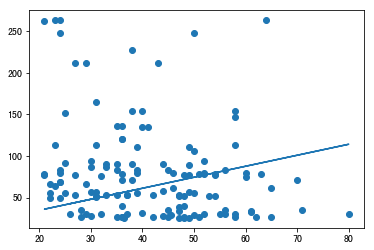

In [37]:
random_method_eval()

looptime=778,1.3460335764183933*x+9.510765603420213 ---->error_fare:44.515338675979756


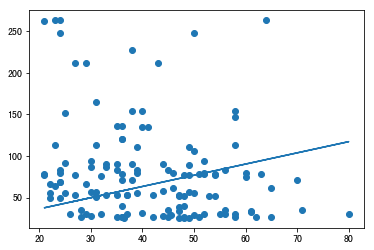

In [38]:
supervised_method_eval()

looptime=1,1.2928003937636958*x+7.456649606602891 ---->error_fare:44.55802820431826


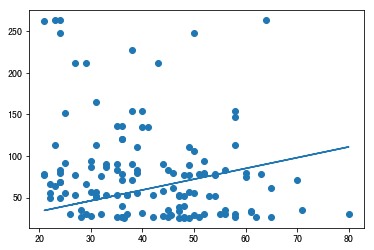

In [41]:
gd_method_eval()